### Домашнее задание к уроку 7.

In [1]:
import math
import scipy as sp
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1

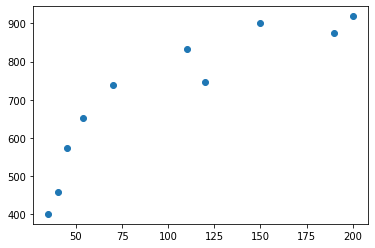

In [2]:
# Строим график зависимости y от X.
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(X, y)
plt.show()

In [3]:
# Расчет коэффициента b (угла наклона к оси Х):
b1 = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2)-np.mean(X)**2)
print(f'Коэффициент b равен: {b1:.2f}')

Коэффициент b равен: 2.62


In [4]:
# Расчет коэффициента a (intercept):
a1 = np.mean(y) - b1*np.mean(X)
print(f'Коэффициент a равен: {a1:.2f}')

Коэффициент a равен: 444.18


In [5]:
# Построение линейной модели:
y1_hat1 = 444.18 + 2.6 * X # модель с intercept
y1_hat2 = 5.8898 * X # модель без intercept
print(f'Оценочные значения y с intercept: {y1_hat1}')
print(f'Оценочные значения y без intercept: {y1_hat2}')

Оценочные значения y с intercept: [535.18 561.18 938.18 964.18 548.18 626.18 584.58 834.18 756.18 730.18]
Оценочные значения y без intercept: [ 206.143   265.041  1119.062  1177.96    235.592   412.286   318.0492
  883.47    706.776   647.878 ]


In [6]:
print(f'Фактические значения y: {y}')

Фактические значения y: [401 574 874 919 459 739 653 902 746 832]


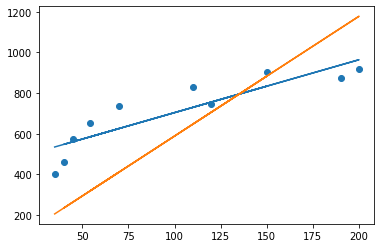

In [7]:
# Построение модели линейной зависимости с intercept:
plt.scatter(X, y)
plt.plot(X, y1_hat1) # синяя линия
plt.plot(X, y1_hat2) # желтая линия
plt.show()

### Построение модели линейной зависимости матричным методом

In [8]:
# Преобразование даных в матричный вид:
X_m = X.reshape((10, 1))
y_m = y.reshape((10, 1))
X_m

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [9]:
# Расчет коэффициента b без intercept:
B = np.dot(np.linalg.inv(np.dot(X_m.T, X_m)), X_m.T@y_m)
B

array([[5.88982042]])

In [10]:
# Добавление столбца intercept
X_m = np.hstack([np.ones((10, 1)), X_m])
X_m

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [11]:
# Расчет коэффициентов a и b:
B = np.dot(np.linalg.inv(np.dot(X_m.T, X_m)), X_m.T@y_m)
B

array([[444.17735732],
       [  2.62053888]])

### Задача 2

In [12]:
# Преобразование даных в векторный вид:
X2 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y2 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [13]:
# Функция средей квадратичной ошибки:
def mse_(B1, y=y2, X=X2, n=10):
    return np.sum((B1*X2-y2)**2)/n

In [14]:
# Скорость обучения (ставится по опыту: должна быть не слишком большая и не слишком маленькая)
alpha = 1e-6
alpha

1e-06

In [15]:
# Средняя квадратичная ошибка:
# mse = (1/n)*np.sum((B1*X-y)**2)
# Производная средней квадратичной ошибки:
# mse_p = (2/n)*np.sum((B1*X-y)*X)

In [16]:
# Начальное значение к-та В1 выбирается из стандартного нормального распределения (т.е. М=0, sigma=1)
B1 = 0.1 # Выбирается из интервала от -3 до 3.
n = 10
for i in range(10):
    B1 -=alpha*(2/n)*np.sum((B1*X2-y2)*X2)
    print('B1 = {}'.format(B1))

B1 = 0.25952808
B1 = 0.414660650906144
B1 = 0.5655188230595969
B1 = 0.7122203698240712
B1 = 0.8548798195302346
B1 = 0.9936085448867542
B1 = 1.1285148499277806
B1 = 1.2597040545647504
B1 = 1.387278576808517
B1 = 1.5113380127259965


In [17]:
for i in range(1000):
    B1 -=alpha*(2/n)*np.sum((B1*X2-y2)*X2)
    if i%100==0:
        print('Iteration: {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1 = 1.6319792141937546, mse = 306275.7568040035
Iteration: 100, B1 = 5.629340281237233, mse = 57451.59938606899
Iteration: 200, B1 = 5.873885137561711, mse = 56520.35675226433
Iteration: 300, B1 = 5.888845554134484, mse = 56516.87150850017
Iteration: 400, B1 = 5.889760781170516, mse = 56516.85846472009
Iteration: 500, B1 = 5.889816771625289, mse = 56516.8584159028
Iteration: 600, B1 = 5.889820196929507, mse = 56516.85841572009
Iteration: 700, B1 = 5.8898204064778845, mse = 56516.85841571941
Iteration: 800, B1 = 5.889820419297334, mse = 56516.85841571941
Iteration: 900, B1 = 5.889820420081584, mse = 56516.85841571941


In [18]:
# Средняя квадратичная ошибка по функции:
mse_(5.889820)

56516.85841572182

### Задача 3

### Задача 4

In [19]:
# Выбираем начальные значения коэффициентов a и b:
a4 = 0.1
b4 = 0.1

In [20]:
# Скорость обучения (ставится по опыту: должна быть не слишком большая и не слишком маленькая)
alpha4 = 1e-5
alpha4

1e-05

In [21]:
# Функция средей квадратичной ошибки:
def mse4_(a4, b4, y=y, X=X, n=10):
    return np.sum((a4 + b4*X - y)**2)/n

In [22]:
for i in range(3500000):
    y4_hut = a4 + b4*X
    a4 -=alpha4*(2/n)*np.sum((y4_hut - y))
    b4 -=alpha4*(2/n)*np.sum((y4_hut - y)*X)
    if i%300000==0:
        print('Iteration: {i}, a = {a4}, b = {b4}, mse = {mse}'.format(i=i, a4=a4, b4=b4, mse=mse4_(a4, b4)))

Iteration: 0, a = 0.1139932, b = 1.6950780000000003, mse = 298805.38996099564
Iteration: 300000, a = 347.24756959921285, b = 3.333984975180734, mse = 8853.693377127487
Iteration: 600000, a = 423.0181317603773, b = 2.77628013758468, mse = 6583.983235150707
Iteration: 900000, a = 439.55841781180436, b = 2.6545363193656377, mse = 6475.8260411356305
Iteration: 1200000, a = 443.1690688992334, b = 2.6279603310016144, mse = 6470.672088478478
Iteration: 1500000, a = 443.95725365219454, b = 2.6221589427433236, mse = 6470.4264901321585
Iteration: 1800000, a = 444.12930993504966, b = 2.6208925324310575, mse = 6470.4147867752
Iteration: 2100000, a = 444.1668688504738, b = 2.6206160822077855, mse = 6470.414229081847
Iteration: 2400000, a = 444.17506774970946, b = 2.6205557346844697, mse = 6470.414202506412
Iteration: 2700000, a = 444.17685752314003, b = 2.620542561160716, mse = 6470.414201240024
Iteration: 3000000, a = 444.17724822057306, b = 2.6205396854548715, mse = 6470.414201179678
Iteration: 3